# Introduction to Linear Programming and Graphical Solutions

## What is Linear Programming (LP)?

Linear Programming (LP) is a mathematical technique for optimization, where the objective is to maximize or minimize a linear function subject to a set of linear constraints.

An LP problem consists of:
- **Objective Function**: A linear function that needs to be optimized (maximized or minimized).
- **Constraints**: A set of linear inequalities or equations that restrict the values of the variables in the objective function.
- **Non-negativity restrictions**: The decision variables are typically restricted to be greater than or equal to zero.



## Standard Form of an LP Problem:

Given:
- Objective function:  
  $$ \text{Maximize/Minimize} \, \text{ :  } \, z = a_1x_1 + a_2x_2 + ... + a_nx_n $$

- Subject to constraints:  
  $$ b_1x_1 + b_2x_2 + ... + b_nx_n \leq c_i \, (\text{or} \, \geq ) $$

- Non-negativity restrictions:  
  $$ x_i \geq 0 \quad \text{for all i} $$

## LP Solving Methodologies

Linear programming problems can be solved using various methods, including:
1. **Graphical Method**: Used for problems with two decision variables, where solutions can be visualized on a graph.
2. **Simplex Method**: A more advanced method used for solving larger problems with more variables.
3. **Interior-Point Methods**: Used for large-scale linear programming problems in optimization software.

## The Graphical Method for Solving LP Problems


The graphical method is one of the simplest techniques for solving linear programming problems, particularly when there are only two variables involved. It involves plotting the feasible region defined by the constraints and then finding the optimal solution by evaluating the objective function at the vertices of the feasible region.

### Steps to Solve an LP Problem Graphically:

1. **Plot the Constraints**: Convert the inequalities into equations and plot the lines corresponding to each constraint on a graph.
2. **Shade the Feasible Region**: Identify the region that satisfies all the constraints. This region is where all inequalities hold true.
3. **Evaluate the Objective Function**: Calculate the objective function at the vertices (corner points) of the feasible region.
4. **Find the Optimal Solution**: The optimal solution occurs at one of the vertices of the feasible region, where the objective function reaches its maximum or minimum.

# Environment Preparation

## Libraries and Tools for Google Colab
To run the code smoothly in Google Colab, install and import these libraries:

```python
# Install necessary libraries using pip.
# numpy: For numerical computations, especially arrays and matrices.
# matplotlib: For creating visualizations, like plotting graphs.
!pip install numpy matplotlib

# Import the numpy library and give it the alias 'np' for easier use.
import numpy as np  

# Import the pyplot module from matplotlib and give it the alias 'plt' for plotting.
import matplotlib.pyplot as plt

# Import the combinations function from itertools to find combinations of elements.
from itertools import combinations

# Import the ipywidgets library and give it the alias 'widgets' for creating interactive UI elements.
import ipywidgets as widgets

# Import the 'display' function from IPython.display to show UI elements in the output.
from IPython.display import display
```

## Code Implementation

In [ ]:
!pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations
import ipywidgets as widgets
from IPython.display import display

# Example Walkthrough

## Problem Definition: (Example 2.3.2)

Objective Function:



$$ \text{Maximize} \, \text{ :  } \, z = 3 x_1 + x_2 $$

Subject to constraints:

- \( $x_1$ + $x_2$ $\leq$ 10 \)
- \( $x_1$ $\leq$ 5 \)
- \( $-x_1$ + $x_2$ $\geq$ -2 \)
- \( $x_1$, $x_2$ $\geq$ 0 \)


## Code Explanation & Implementation

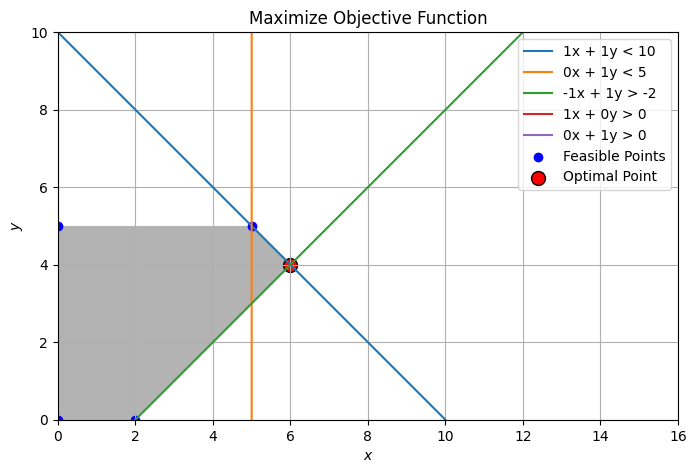

In [ ]:
def find_intersection(line1, line2):
    """
    Finds the intersection point of two lines represented in the form (a, b, c) where ax + by = c.

    Args:
        line1: Tuple (a, b, c) representing the first line.
        line2: Tuple (a, b, c) representing the second line.

    Returns:
        A NumPy array representing the intersection point (x, y), or None if the lines are parallel.
    """
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])  # Create a matrix of coefficients
    b = np.array([line1[2], line2[2]])  # Create a vector of constants
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)  # Solve the system of equations to find the intersection

def is_feasible(point, constraints):
    """
    Checks if a point (x, y) is feasible (satisfies all constraints).

    Args:
        point: Tuple (x, y) representing the point.
        constraints: A list of tuples, each representing a constraint in the form (a, b, c, sign).

    Returns:
        True if the point is feasible, False otherwise.
    """
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):  # Check if the point violates a '<=' constraint
            return False
        if sign == '>' and not (a * x + b * y >= c):  # Check if the point violates a '>=' constraint
            return False
    return True  # Point satisfies all constraints

def find_optimal_points(obj_type, a, b, constraints):
    """
    Finds all feasible points and the optimal point.

    Args:
        obj_type: String, either "maximize" or "minimize", indicating the objective.
        a: Coefficient of x in the objective function.
        b: Coefficient of y in the objective function.
        constraints: A list of tuples, each representing a constraint.

    Returns:
        A tuple containing:
            - A NumPy array of feasible points.
            - The optimal point as a NumPy array.
    """
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):  # Iterate through all pairs of constraints
        intersection = find_intersection(line1, line2)  # Find their intersection
        if intersection is not None and is_feasible(intersection, constraints):  # Check if feasible
            feasible_points.append(intersection)

    feasible_points = np.array(feasible_points)
    if feasible_points.size == 0:
        print("No feasible region found")
        return np.array([]), None

    obj_values = [a * x + b * y for x, y in feasible_points]  # Calculate objective function values
    optimal_index = np.argmax(obj_values) if obj_type == "maximize" else np.argmin(obj_values)  # Find optimal index
    optimal_point = feasible_points[optimal_index]  # Get the optimal point
    return feasible_points, optimal_point

def plot_feasible_region(constraints, x_range, y_range):
    """
    Plots the feasible region defined by the constraints.

    Args:
        constraints: A list of tuples, each representing a constraint.
        x_range: A NumPy array of x-values for the plot.
        y_range: A NumPy array of y-values for the plot.
    """
    x, y = np.meshgrid(x_range, y_range)  # Create a grid of points
    feasible_region = np.ones_like(x, dtype=bool)  # Initialize feasible region as all True

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)  # Update feasible region based on '<=' constraints
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)  # Update feasible region based on '>=' constraints

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()),
               origin="lower", cmap="Greys", alpha=0.3)  # Plot the feasible region

def plot_constraints(constraints, x_range):
    """
    Plots the lines representing the constraints.

    Args:
        constraints: A list of tuples, each representing a constraint.
        x_range: A NumPy array of x-values for the plot.
    """
    for a, b, c, sign in constraints:
        y_vals = np.linspace(0, 10, 2000)  # Generate y-values for the line
        if a != 0:
            x_vals = (c - b * y_vals) / a  # Calculate corresponding x-values
        else:
            x_vals = np.full_like(y_vals, c / b)  # Handle vertical lines (a = 0)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')  # Plot the line

def graphical_method(obj_type, a, b, constraints):
    """
    Solves a linear programming problem graphically and displays the solution.

    Args:
        obj_type: String, either "maximize" or "minimize", indicating the objective.
        a: Coefficient of x in the objective function.
        b: Coefficient of y in the objective function.
        constraints: A list of tuples, each representing a constraint.
    """
    x_range = np.linspace(0, 16, 300)  # Define the range of x-values for the plot
    y_range = np.linspace(0, 10, 300)  # Define the range of y-values for the plot
    plt.figure(figsize=(8, 8))  # Create a figure for the plot
    plot_feasible_region(constraints, x_range, y_range)  # Plot the feasible region
    plot_constraints(constraints, x_range)  # Plot the constraint lines

    feasible_points, optimal_point = find_optimal_points(obj_type, a, b, constraints)  # Find feasible and optimal points

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)  # Extract x and y coordinates of feasible points
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')  # Plot feasible points

    if optimal_point is not None:
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')  # Plot optimal point

    plt.xlim(0, 16)  # Set x-axis limits
    plt.ylim(0, 10)  # Set y-axis limits
    plt.xlabel(r'$x$')  # Label x-axis
    plt.ylabel(r'$y$')  # Label y-axis
    plt.legend(loc='upper right')  # Place legend in upper right corner
    plt.title(f"{obj_type.capitalize()} Objective Function")  # Set plot title
    plt.grid(True)  # Show grid
    plt.show()  # Display the plot



def solve_example():
    """
    Defines and solves an example linear programming problem.
    """
    # Example problem definition: objective function, coefficients, and constraints
    example = [
        ("maximize", 3, 1, [(1, 1, 10, '<'), (0, 1, 5, '<'), (-1, 1, -2, '>'), (1, 0, 0, '>'), (0, 1, 0, '>')])
    ]

    # Solve the example problem using the graphical method
    for obj_type, a, b, constraints in example:
        graphical_method(obj_type, a, b, constraints)


solve_example() # Call the solve_example function to run the code

# Additional Examples

## Problem Definition: (Example 2.3.2 : Minimization Problem)

### Objective Function:



$$ \text{Minimize} \, \text{ :  } \, z = x_1 + x_2 $$

### Subject to constraints:

- \( 3$x_1$ + $x_2$ $\geq$ 6 \)
- \( $x_2$ $\geq$ 3 \)
- \( $x_1$ $\leq$ 4 \)
- \( $x_1$, $x_2$ $\geq$ 0 \)

## Code Implementation

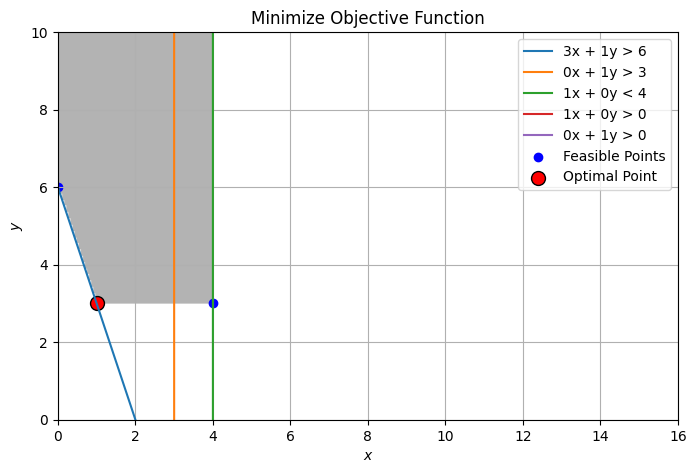

In [ ]:
def find_intersection(line1, line2):
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):
            return False
        if sign == '>' and not (a * x + b * y >= c):
            return False
    return True

def find_optimal_points(obj_type, a, b, constraints):
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_points.append(intersection)

    feasible_points = np.array(feasible_points)
    if feasible_points.size == 0:
        print("No feasible region found")
        return np.array([]), None

    obj_values = [a * x + b * y for x, y in feasible_points]
    optimal_index = np.argmax(obj_values) if obj_type == "maximize" else np.argmin(obj_values)
    optimal_point = feasible_points[optimal_index]
    return feasible_points, optimal_point

def plot_feasible_region(constraints, x_range, y_range):
    x, y = np.meshgrid(x_range, y_range)
    feasible_region = np.ones_like(x, dtype=bool)

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()), origin="lower", cmap="Greys", alpha=0.3)

def plot_constraints(constraints, x_range):
    for a, b, c, sign in constraints:
        y_vals = np.linspace(0, 10, 2000)
        if a != 0:
            x_vals = (c - b * y_vals) / a
        else:
            x_vals = np.full_like(y_vals, c / b)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')

def graphical_method(obj_type, a, b, constraints):
    x_range = np.linspace(0, 16, 300)
    y_range = np.linspace(0, 10, 300)
    plt.figure(figsize=(8, 8))
    plot_feasible_region(constraints, x_range, y_range)
    plot_constraints(constraints, x_range)

    feasible_points, optimal_point = find_optimal_points(obj_type, a, b, constraints)

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')

    if optimal_point is not None:
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')

    plt.xlim(0, 16)
    plt.ylim(0, 10)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend(loc='upper right')
    plt.title(f"{obj_type.capitalize()} Objective Function")
    plt.grid(True)
    plt.show()

def solve_example():
    example = [
        ("minimize", 1, 1, [(3, 1, 6, '>'), (0, 1, 3, '>'), (1, 0, 4, '<'), (1, 0, 0, '>'), (0, 1, 0, '>')])
    ]

    for obj_type, a, b, constraints in example:
        graphical_method(obj_type, a, b, constraints)

solve_example()

## Problem Definition: (Example 2.3.3 : Multiple Optimal Solutions)

### Objective Function:

$$ \text{Maximize} \, \text{ :  } \, z = x_1 + 2x_2 $$

### Subject to constraints:

- \( -$x_1$ + $x_2$ $\leq$ 2 \)
- \( $x_1$ + 2$x_2$ $\leq$ 8 \)
- \( $x_1$ $\leq$ 6 \)
- \( $x_1$, $x_2$ $\geq$ 0 \)

## Code Implementation

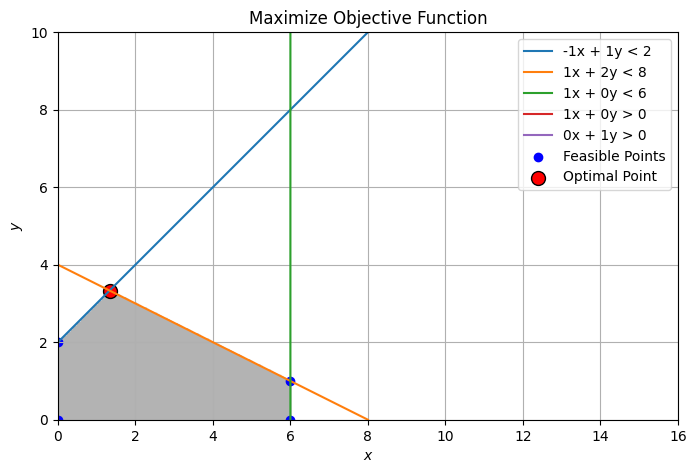

In [ ]:
def find_intersection(line1, line2):
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):
            return False
        if sign == '>' and not (a * x + b * y >= c):
            return False
    return True

def find_optimal_points(obj_type, a, b, constraints):
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_points.append(intersection)

    feasible_points = np.array(feasible_points)
    if feasible_points.size == 0:
        print("No feasible region found")
        return np.array([]), None

    obj_values = [a * x + b * y for x, y in feasible_points]
    optimal_index = np.argmax(obj_values) if obj_type == "maximize" else np.argmin(obj_values)
    optimal_point = feasible_points[optimal_index]
    return feasible_points, optimal_point

def plot_feasible_region(constraints, x_range, y_range):
    x, y = np.meshgrid(x_range, y_range)
    feasible_region = np.ones_like(x, dtype=bool)

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()), origin="lower", cmap="Greys", alpha=0.3)

def plot_constraints(constraints, x_range):
    for a, b, c, sign in constraints:
        y_vals = np.linspace(0, 10, 2000)
        if a != 0:
            x_vals = (c - b * y_vals) / a
        else:
            x_vals = np.full_like(y_vals, c / b)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')

def graphical_method(obj_type, a, b, constraints):
    x_range = np.linspace(0, 16, 300)
    y_range = np.linspace(0, 10, 300)
    plt.figure(figsize=(8, 8))
    plot_feasible_region(constraints, x_range, y_range)
    plot_constraints(constraints, x_range)

    feasible_points, optimal_point = find_optimal_points(obj_type, a, b, constraints)

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')

    if optimal_point is not None:
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')

    plt.xlim(0, 16)
    plt.ylim(0, 10)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend(loc='upper right')
    plt.title(f"{obj_type.capitalize()} Objective Function")
    plt.grid(True)
    plt.show()

def solve_example():
    example = [
        ("maximize", 1, 2, [(-1, 1, 2, '<'), (1, 2, 8, '<'), (1, 0, 6, '<'), (1, 0, 0, '>'), (0, 1, 0, '>')])
    ]

    for obj_type, a, b, constraints in example:
        graphical_method(obj_type, a, b, constraints)

solve_example()


## Problem Definition: (Example 2.3.4 : No Optimal Solution)

### Objective Function:

$$ \text{Maximize} \, \text{ :  } \, z = 3x_1 + x_2 $$

### Subject to constraints:

- \( $x_1$ + $x_2$ $\geq$ 4 \)
- \( -$x_1$ + $x_2$ $\leq$ 4 \)
- \( -$x_1$ + 2$x_2$ $\geq$ -4 \)
- \( $x_1$, $x_2$ $\geq$ 0 \)

## Code Implementation

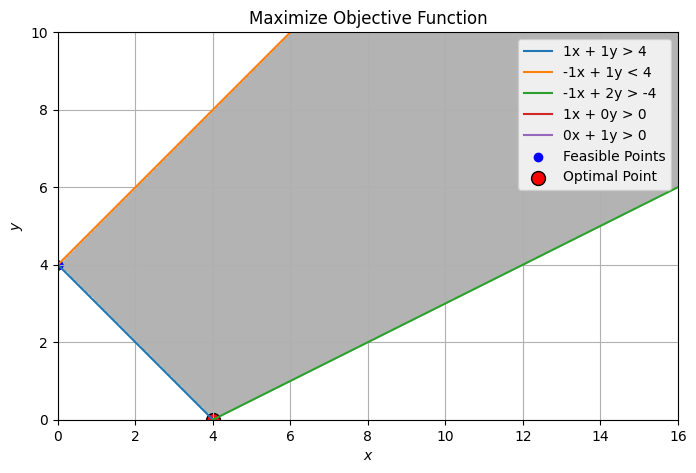

In [ ]:
def find_intersection(line1, line2):
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):
            return False
        if sign == '>' and not (a * x + b * y >= c):
            return False
    return True

def find_optimal_points(obj_type, a, b, constraints):
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_points.append(intersection)

    feasible_points = np.array(feasible_points)
    if feasible_points.size == 0:
        print("No feasible region found")
        return np.array([]), None

    obj_values = [a * x + b * y for x, y in feasible_points]
    optimal_index = np.argmax(obj_values) if obj_type == "maximize" else np.argmin(obj_values)
    optimal_point = feasible_points[optimal_index]
    return feasible_points, optimal_point

def plot_feasible_region(constraints, x_range, y_range):
    x, y = np.meshgrid(x_range, y_range)
    feasible_region = np.ones_like(x, dtype=bool)

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()), origin="lower", cmap="Greys", alpha=0.3)

def plot_constraints(constraints, x_range):
    for a, b, c, sign in constraints:
        y_vals = np.linspace(0, 10, 2000)
        if a != 0:
            x_vals = (c - b * y_vals) / a
        else:
            x_vals = np.full_like(y_vals, c / b)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')

def graphical_method(obj_type, a, b, constraints):
    x_range = np.linspace(0, 16, 300)
    y_range = np.linspace(0, 10, 300)
    plt.figure(figsize=(8, 8))
    plot_feasible_region(constraints, x_range, y_range)
    plot_constraints(constraints, x_range)

    feasible_points, optimal_point = find_optimal_points(obj_type, a, b, constraints)

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')

    if optimal_point is not None:
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')

    plt.xlim(0, 16)
    plt.ylim(0, 10)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend(loc='upper right')
    plt.title(f"{obj_type.capitalize()} Objective Function")
    plt.grid(True)
    plt.show()

def solve_example():
    example = [
        ("maximize", 3, 1, [(1, 1, 4, '>'), (-1, 1, 4, '<'), (-1, 2, -4, '>'), (1, 0, 0, '>'), (0, 1, 0, '>')])
    ]

    for obj_type, a, b, constraints in example:
        graphical_method(obj_type, a, b, constraints)

solve_example()


## Problem Definition: (Example 2.3.5 : No Feasible Solution)

### Objective Function:

$$ \text{Maximize} \, \text{ :  } \, z = x_1 + x_2 $$

### Subject to constraints:

- \( -$x_1$ + $x_2$ $\geq$ 4 \)
- \( -$x_1$ + 2$x_2$ $\leq$ -4 \)
- \( $x_1$, $x_2$ $\geq$ 0 \)

## Code Implementation

No feasible region found


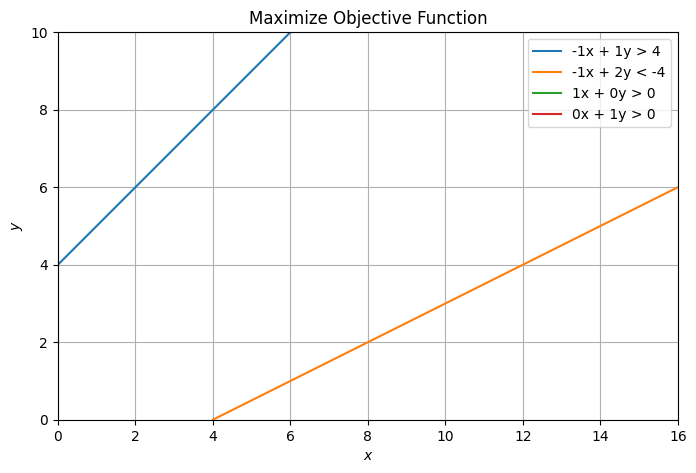

In [ ]:
def find_intersection(line1, line2):
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):
            return False
        if sign == '>' and not (a * x + b * y >= c):
            return False
    return True

def find_optimal_points(obj_type, a, b, constraints):
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_points.append(intersection)

    feasible_points = np.array(feasible_points)
    if feasible_points.size == 0:
        print("No feasible region found")
        return np.array([]), None

    obj_values = [a * x + b * y for x, y in feasible_points]
    optimal_index = np.argmax(obj_values) if obj_type == "maximize" else np.argmin(obj_values)
    optimal_point = feasible_points[optimal_index]
    return feasible_points, optimal_point

def plot_feasible_region(constraints, x_range, y_range):
    x, y = np.meshgrid(x_range, y_range)
    feasible_region = np.ones_like(x, dtype=bool)

    for a, b, c, sign in constraints:
        if sign == '<':
            feasible_region &= (a * x + b * y <= c)
        elif sign == '>':
            feasible_region &= (a * x + b * y >= c)

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()), origin="lower", cmap="Greys", alpha=0.3)

def plot_constraints(constraints, x_range):
    for a, b, c, sign in constraints:
        y_vals = np.linspace(0, 10, 2000)
        if a != 0:
            x_vals = (c - b * y_vals) / a
        else:
            x_vals = np.full_like(y_vals, c / b)
        plt.plot(x_vals, y_vals, label=f'{a}x + {b}y {sign} {c}')

def graphical_method(obj_type, a, b, constraints):
    x_range = np.linspace(0, 16, 300)
    y_range = np.linspace(0, 10, 300)
    plt.figure(figsize=(8, 8))
    plot_feasible_region(constraints, x_range, y_range)
    plot_constraints(constraints, x_range)

    feasible_points, optimal_point = find_optimal_points(obj_type, a, b, constraints)

    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')

    if optimal_point is not None:
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')

    plt.xlim(0, 16)
    plt.ylim(0, 10)
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend(loc='upper right')
    plt.title(f"{obj_type.capitalize()} Objective Function")
    plt.grid(True)
    plt.show()

def solve_example():
    example = [
        ("maximize", 1, 1, [(-1, 1, 4, '>'), (-1, 2, -4, '<'), (1, 0, 0, '>'), (0, 1, 0, '>')])
    ]

    for obj_type, a, b, constraints in example:
        graphical_method(obj_type, a, b, constraints)

solve_example()

# Interactive Example

Use the widget to input custom coefficients for the objective function and constraints after executing the code below. Then, view the solution.


## Code Implementation

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display
from itertools import combinations

def find_intersection(line1, line2):
    A = np.array([[line1[0], line1[1]], [line2[0], line2[1]]])
    b = np.array([line1[2], line2[2]])
    if np.linalg.det(A) == 0:
        return None  # Parallel lines, no intersection
    return np.linalg.solve(A, b)

def is_feasible(point, constraints):
    x, y = point
    for a, b, c, sign in constraints:
        if sign == '<' and not (a * x + b * y <= c):
            return False
        if sign == '>' and not (a * x + b * y >= c):
            return False
    return True

def find_optimal_points(obj_type, a, b, constraints):
    feasible_points = []
    for (line1, line2) in combinations(constraints, 2):
        intersection = find_intersection(line1, line2)
        if intersection is not None and is_feasible(intersection, constraints):
            feasible_points.append(intersection)

    feasible_points = np.array(feasible_points)
    if feasible_points.size == 0:
        return np.array([]), None

    obj_values = [a * x + b * y for x, y in feasible_points]
    optimal_index = np.argmax(obj_values) if obj_type == "maximize" else np.argmin(obj_values)
    optimal_point = feasible_points[optimal_index]
    return feasible_points, optimal_point

def plot_feasible_region_and_objective(constraints, a, b, obj_type, x_range, y_range):
    x, y = np.meshgrid(x_range, y_range)
    feasible_region = np.ones_like(x, dtype=bool)

    for a_c, b_c, c_c, sign in constraints:
        if sign == '<':
            feasible_region &= (a_c * x + b_c * y <= c_c)
        elif sign == '>':
            feasible_region &= (a_c * x + b_c * y >= c_c)

    plt.imshow(feasible_region.astype(int), extent=(x.min(), x.max(), y.min(), y.max()), origin="lower", cmap="Greys", alpha=0.3)

    for a_c, b_c, c_c, sign in constraints:
        y_vals = np.linspace(y_range.min(), y_range.max(), 200)
        if a_c != 0:
            x_vals = (c_c - b_c * y_vals) / a_c
        else:
            x_vals = np.full_like(y_vals, c_c / b_c)
        plt.plot(x_vals, y_vals, label=f'{a_c}x + {b_c}y {sign} {c_c}')

    feasible_points, optimal_point = find_optimal_points(obj_type, a, b, constraints)
    if feasible_points.size > 0:
        feasible_x, feasible_y = zip(*feasible_points)
        plt.scatter(feasible_x, feasible_y, color='blue', label='Feasible Points')

    if optimal_point is not None:
        plt.scatter(*optimal_point, color='red', s=100, label='Optimal Point', edgecolors='black')

    obj_x = np.linspace(x_range.min(), x_range.max(), 200)
    obj_y = (-a * obj_x) / b if b != 0 else np.full_like(obj_x, 0)
    plt.plot(obj_x, obj_y, '--r', label='Objective Function')

    plt.xlim(x_range.min(), x_range.max())
    plt.ylim(y_range.min(), y_range.max())
    plt.xlabel(r'$x$')
    plt.ylabel(r'$y$')
    plt.legend(loc='upper right')
    plt.title(f"{obj_type.capitalize()} Objective Function")
    plt.grid(True)
    plt.show()

def update_plot(obj_type, a, b, *constraint_values):
    num_constraints = len(constraint_values) // 4
    constraints = [(constraint_values[i * 4], constraint_values[i * 4 + 1], constraint_values[i * 4 + 2], constraint_values[i * 4 + 3]) for i in range(num_constraints)]

    x_range = np.linspace(0, 16, 300)
    y_range = np.linspace(0, 10, 300)
    plt.figure(figsize=(8, 8))
    plot_feasible_region_and_objective(constraints, a, b, obj_type, x_range, y_range)

def interactive_solver():
    obj_type = widgets.Dropdown(
        options=['maximize', 'minimize'],
        description='Objective:',
    )

    a_slider = widgets.FloatSlider(value=1, min=-20, max=20, step=1, description='a (x):')
    b_slider = widgets.FloatSlider(value=1, min=-20, max=20, step=1, description='b (y):')

    num_constraints = widgets.Dropdown(options=[1, 2, 3, 4, 5, 6], description='Constraints:')

    constraint_sliders = []
    def update_constraints(*args):
        nonlocal constraint_sliders
        for slider in constraint_sliders:
            slider.close()
        constraint_sliders.clear()

        for i in range(num_constraints.value):
            a_s = widgets.FloatSlider(value=1, min=-20, max=20, step=1, description=f'a{i+1}:')
            b_s = widgets.FloatSlider(value=1, min=-20, max=20, step=1, description=f'b{i+1}:')
            c_s = widgets.FloatSlider(value=5, min=-20, max=20, step=1, description=f'c{i+1}:')
            sign_s = widgets.Dropdown(options=['<', '>'], description=f'sign{i+1}:')
            constraint_sliders.extend([a_s, b_s, c_s, sign_s])
        display_controls()

    num_constraints.observe(update_constraints, names='value')

    def display_controls():
        ui = widgets.VBox([obj_type, a_slider, b_slider, num_constraints] + constraint_sliders)
        output = widgets.Output()

        def update(_):
            with output:
                output.clear_output(wait=True)
                update_plot(obj_type.value, a_slider.value, b_slider.value, *[s.value for s in constraint_sliders])

        for slider in [a_slider, b_slider, num_constraints] + constraint_sliders + [obj_type]:
            slider.observe(update, names='value')

        display(ui, output)
        update(None)

    update_constraints()

interactive_solver()

Output()

Output()

# Conclusion

The graphical method provides an intuitive way to solve linear programming problems with two variables. However, for more complex problems, the **Simplex Method** is used, which will be covered in later sections.